In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
N = 200
X = np.random.random(N)*9-5
y= 0.5 * X - 1 + np.random.random(N) * 0.5

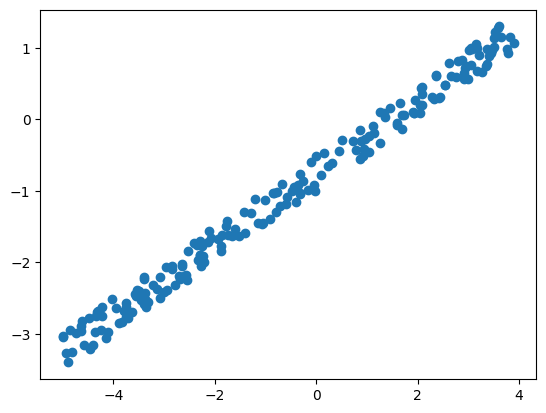

In [9]:
plt.scatter(X,y)

In [10]:
#construir el modelo

i = Input(shape=(1,)) #es un tensor unidimensional con forma (1), lo que significa que solo hay una característica para cada ejemplo
x = Dense(1)(i) #Define una capa densa (totalmente conectada) con una unidad de salida

modelo = Model(i, x)


In [11]:
modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
modelo.compile(
    loss="mse", #establece la función de pérdida del modelo en el error cuadrático medio (MSE)
    optimizer=Adam(learning_rate=0.1), #Adam es un algoritmo de optimización popular y eficiente que ajusta la tasa de aprendizaje
    metrics=["mae"] #también queremos monitorear la métrica de error absoluto medio
)

In [16]:
r = modelo.fit(
    X.reshape(-1,1), y,
    epochs=800,
    batch_size=32,    
)

Epoch 1/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7057 - mae: 1.8882  
Epoch 2/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3450 - mae: 0.4623 
Epoch 3/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3729 - mae: 0.5220 
Epoch 4/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3393 - mae: 0.4963 
Epoch 5/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0531 - mae: 0.1829 
Epoch 6/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0815 - mae: 0.2363 
Epoch 7/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0491 - mae: 0.1835 
Epoch 8/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - mae: 0.1367 
Epoch 9/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0324 - mae: 0.1468 
Epoch 10/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0226 - mae: 0.1306 
Epoch 11/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0243 - mae: 0.1360 
Epoch 12/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217 - mae: 0.1295 
Epoch 13/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [17]:
Xtest = np.linspace(-4, 4, 20).reshape(-1,1)
ptest = modelo.predict(Xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


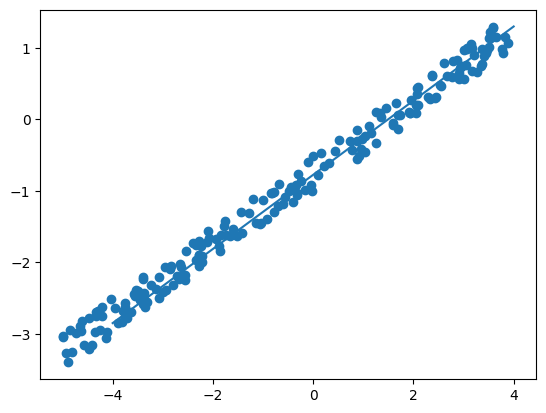

In [18]:
plt.scatter(X,y)
plt.plot(Xtest,ptest)

In [19]:
modelo.layers[1].get_weights()

[array([[0.5181966]], dtype=float32), array([-0.77491236], dtype=float32)]